<a href="https://colab.research.google.com/github/falawar7/AAI_635O/blob/main/Week2/P1_FE_Practical_Exercise_Age_Group_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Analyzing Customer Purchase Data by Age Group
In this exercise, you will analyze purchase data and visualize the most popular items for different age groups. Some parts of the code are missing. Your task is to complete the missing sections.

Instructions:
- Fill in the missing code sections marked as # FILL IN THE CODE.
- Read the comments carefully for guidance.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Set a random seed for reproducibility
np.random.seed(40)

# Load the dataset
df = pd.read_csv('/content/drive/Othercomputers/THINKPAD-T14/AI/Reommender_System/Week2/Lesson1_from_course/data.csv', encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **Assign Age Groups**

In [4]:
# Set a random seed for reproducibility
np.random.seed(40)
# Create a list of age groups
age_groups = ['18-30', '31-45', '46-60', '60+']

# Set random seed for reproducibility
np.random.seed(42)

# Assign a random age group to each customer
df['Age Group'] = np.random.choice(age_groups, size=len(df))

# Group the data by 'Age Group' and 'Description', summing the 'Quantity'
age_grouped = df.groupby(['Age Group', 'Description'])['Quantity'].sum().reset_index()

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Age Group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,46-60
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,60+
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,18-30
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,46-60
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,46-60


In [6]:
count = Counter(df['Age Group'])
print(count)

Counter({'18-30': 135759, '31-45': 135545, '60+': 135447, '46-60': 135158})


# **Data Grouping**

**Calculate total quantity sold for each product for the '18-30' age group**

In [7]:
# Calculate total quantity sold for each product by age group
total_quantity_by_age_product = (
    df.groupby(['Age Group', 'Description'])['Quantity'].sum().reset_index()
)

# Print the result
print(total_quantity_by_age_product)

      Age Group                     Description  Quantity
0         18-30   4 PURPLE FLOCK DINNER CANDLES        27
1         18-30   50'S CHRISTMAS GIFT BAG LARGE       757
2         18-30               DOLLY GIRL BEAKER       840
3         18-30     I LOVE LONDON MINI BACKPACK        66
4         18-30         NINE DRAWER OFFICE TIDY        22
...         ...                             ...       ...
15077       60+                   wrong barcode      -323
15078       60+                      wrong code      -110
15079       60+             wrongly coded 20713      -200
15080       60+     wrongly marked carton 22804      -256
15081       60+    wrongly sold (22719) barcode       170

[15082 rows x 3 columns]


**Calculate total quantity sold for each product for the '31-45' age group**

In [22]:
# Calculate total quantity sold for each product for the '18-30' age group
total_quantity_18_30 = (
    df[df['Age Group'] == '18-30']
    .groupby(['Description'])['Quantity']
    .sum()
    .reset_index()
)
print(total_quantity_18_30)

                         Description  Quantity
0      4 PURPLE FLOCK DINNER CANDLES        27
1      50'S CHRISTMAS GIFT BAG LARGE       757
2                  DOLLY GIRL BEAKER       840
3        I LOVE LONDON MINI BACKPACK        66
4            NINE DRAWER OFFICE TIDY        22
...                              ...       ...
3748           wrong barcode (22467)      -178
3749                     wrong code?      -100
3750                  wrongly marked        48
3751            wrongly marked 23343       200
3752    wrongly marked. 23343 in box     -3100

[3753 rows x 2 columns]


**Calculate total quantity sold for each product for the '18-30' age group**

In [25]:
# Calculate total quantity sold for each product for the '18-30' age group
total_quantity_31_45 = (df[df['Age Group'] == '31-45'].groupby(['Description'])['Quantity'].sum().reset_index())
print(total_quantity_31_45)

                         Description  Quantity
0      4 PURPLE FLOCK DINNER CANDLES        57
1      50'S CHRISTMAS GIFT BAG LARGE       349
2                  DOLLY GIRL BEAKER       446
3        I LOVE LONDON MINI BACKPACK       161
4        I LOVE LONDON MINI RUCKSACK         1
...                              ...       ...
3768                     thrown away      -171
3769                   website fixed       110
3770                             wet       -48
3771                      wet pallet      -696
3772                       wet/rusty       -30

[3773 rows x 2 columns]


**Calculate total quantity sold for each product for the '46-60' age group**

In [26]:
# Calculate total quantity sold for each product for the '46-60' age group
total_quantity_46_60 = (df[df['Age Group'] == '46-60'].groupby(['Description'])['Quantity'].sum().reset_index())
print(total_quantity_46_60)

                         Description  Quantity
0      4 PURPLE FLOCK DINNER CANDLES        26
1      50'S CHRISTMAS GIFT BAG LARGE       401
2                  DOLLY GIRL BEAKER       307
3        I LOVE LONDON MINI BACKPACK        62
4            NINE DRAWER OFFICE TIDY        18
...                              ...       ...
3758                       wet/rusty       -30
3759             wrongly coded 23343      1000
3760             wrongly coded-23343      -800
3761            wrongly sold as sets      -600
3762               wrongly sold sets      -975

[3763 rows x 2 columns]


**Calculate total quantity sold for each product for the '60+' age group**

In [29]:
# Calculate total quantity sold for each product for the '46-60' age group
total_quantity_above_60 = (
    df[df['Age Group'] == '60+']
    .groupby(['Description'])['Quantity']
    .sum()
    .reset_index()
)
print(total_quantity_above_60)

                         Description  Quantity
0      4 PURPLE FLOCK DINNER CANDLES        34
1      50'S CHRISTMAS GIFT BAG LARGE       406
2                  DOLLY GIRL BEAKER       855
3        I LOVE LONDON MINI BACKPACK       100
4            NINE DRAWER OFFICE TIDY         9
...                              ...       ...
3788                   wrong barcode      -323
3789                      wrong code      -110
3790             wrongly coded 20713      -200
3791     wrongly marked carton 22804      -256
3792    wrongly sold (22719) barcode       170

[3793 rows x 2 columns]


# **Data Visualization**

In [60]:
def plot_top_10_items_by_age_group(age_group):
    # Filter data for the specific age group
    age_group_data = age_grouped[age_grouped['Age Group'] == age_group]

    # Sort data by 'Quantity' in descending order and get the top 10 items
    top_items = age_group_data.sort_values(by='Quantity', ascending=False).head(10)

    # Plot the top 10 items
    plt.figure(figsize=(10, 6))
    sns.barplot(y='Description', x='Quantity', data=top_items)
    plt.title(f'Top 10 Most Popular Items for Age Group: {age_group}', fontsize=14 )
    plt.ylabel('Item')
    plt.xlabel('Quantity')
    plt.show()

 **Plotting the Top 10 Most Popular Items for Age Group 18-30**

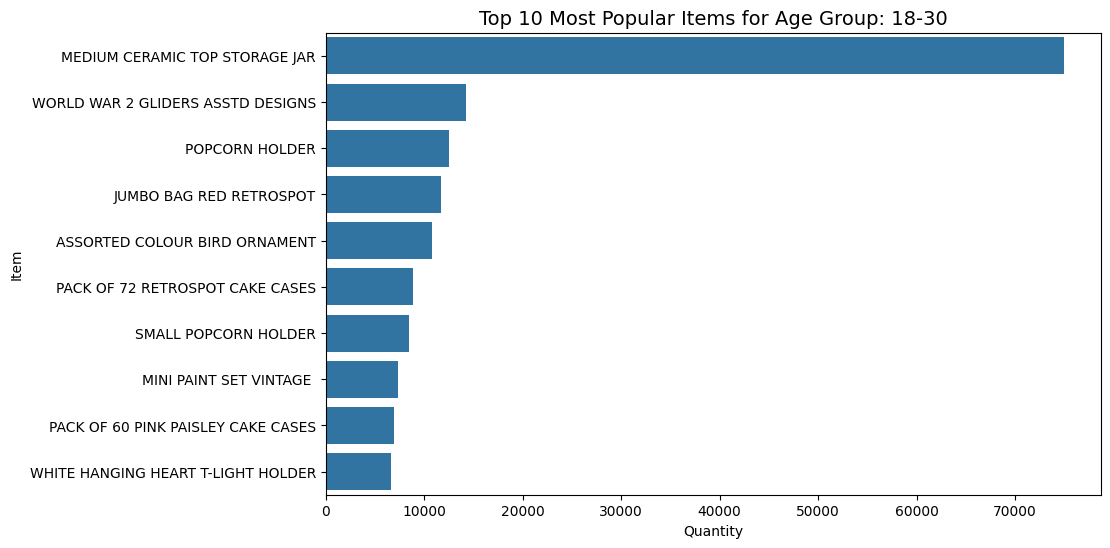

In [61]:
plot_top_10_items_by_age_group('18-30')

 **Plotting the Top 10 Most Popular Items for Age Group 31-45**

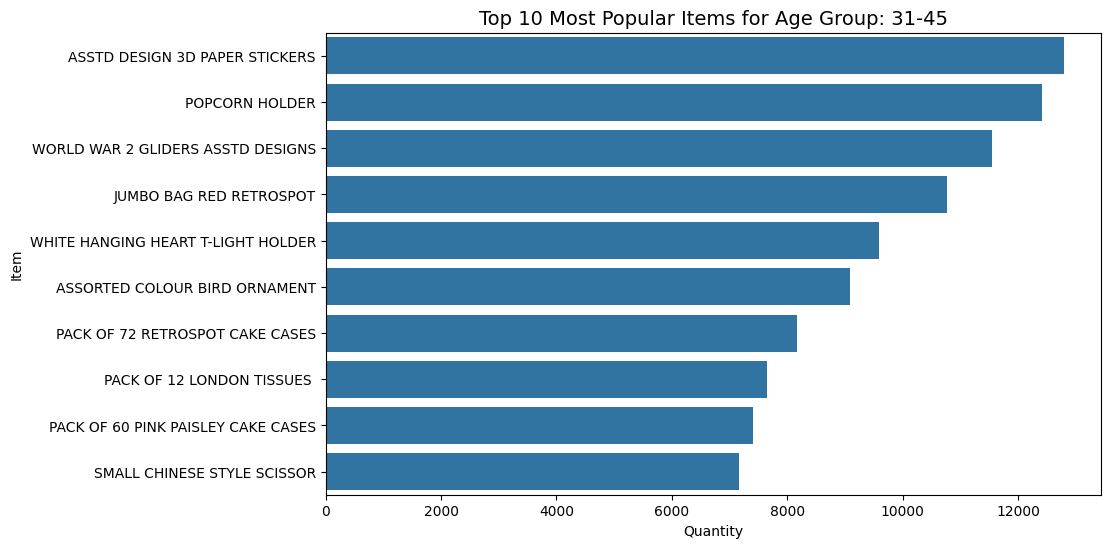

In [62]:
plot_top_10_items_by_age_group('31-45')

 **Plotting the Top 10 Most Popular Items for Age Group 46-60**

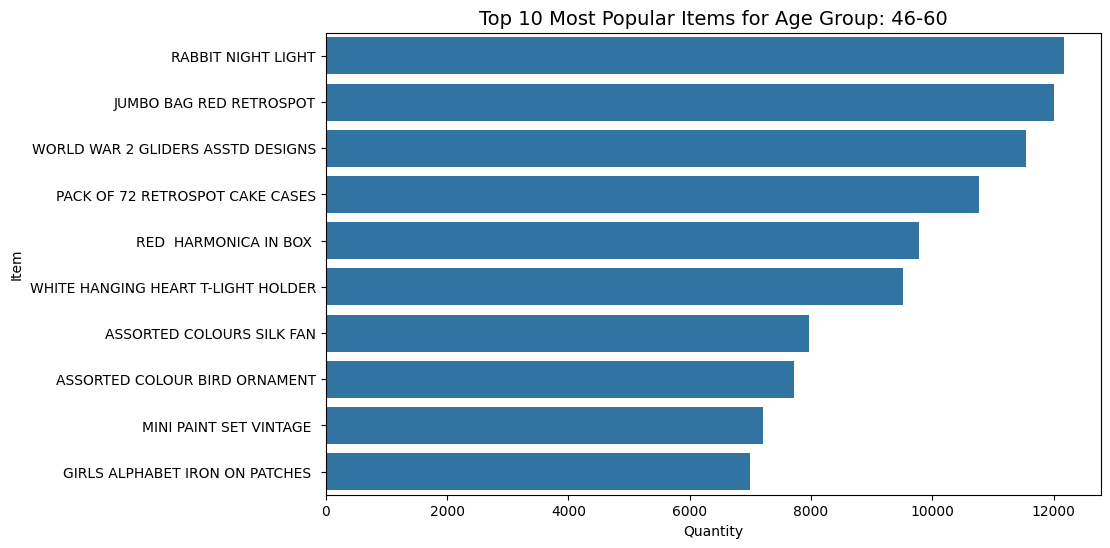

In [63]:
plot_top_10_items_by_age_group('46-60')

 **Plotting the Top 10 Most Popular Items for Age Group 60+**

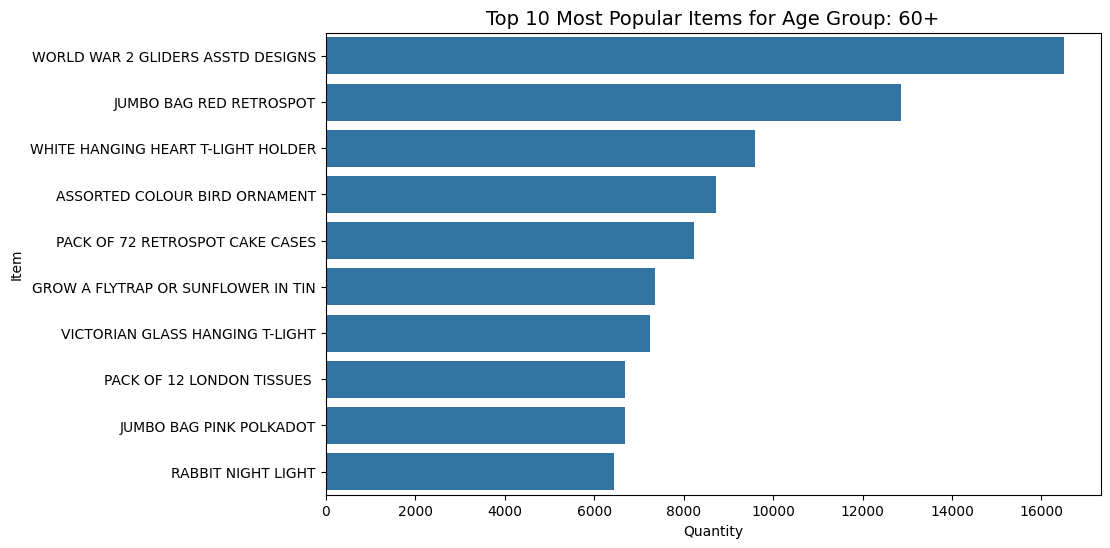

In [64]:
plot_top_10_items_by_age_group('60+')